In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## `Scaling Numerical Data`

In [5]:
df = data.iloc[1:,3:30]
sc = StandardScaler()
data_norm = sc.fit_transform(df)
data_norm

array([[-1.18297065e+00,  4.86455841e-01, -5.11229305e-01, ...,
        -4.40652649e-02,  5.77927331e+00, -7.07106781e-01],
       [-1.05315680e+00,  5.58444994e-01, -5.11229305e-01, ...,
        -4.40652649e-02,  5.77927331e+00, -7.07106781e-01],
       [-1.21581511e+00, -1.90617243e+00, -6.42279933e-03, ...,
        -4.40652649e-02, -1.73032135e-01, -7.07106781e-01],
       ...,
       [-8.49833910e-01,  4.72300670e-01, -1.56473854e+00, ...,
        -4.40652649e-02, -1.73032135e-01, -7.07106781e-01],
       [ 5.46837944e-01,  2.66444046e-01,  4.98383707e-01, ...,
        -4.40652649e-02, -1.73032135e-01, -7.07106781e-01],
       [-1.68971385e+00, -1.78807786e+00, -1.74032341e+00, ...,
         2.26936114e+01, -1.73032135e-01, -7.07106781e-01]])

# `Visualization`

## `Bar chart for RH`

(array([ 21.,  96., 130., 104.,  63.,  40.,  31.,  20.,   7.,   5.]),
 array([ 15. ,  23.5,  32. ,  40.5,  49. ,  57.5,  66. ,  74.5,  83. ,
         91.5, 100. ]),
 <BarContainer object of 10 artists>)

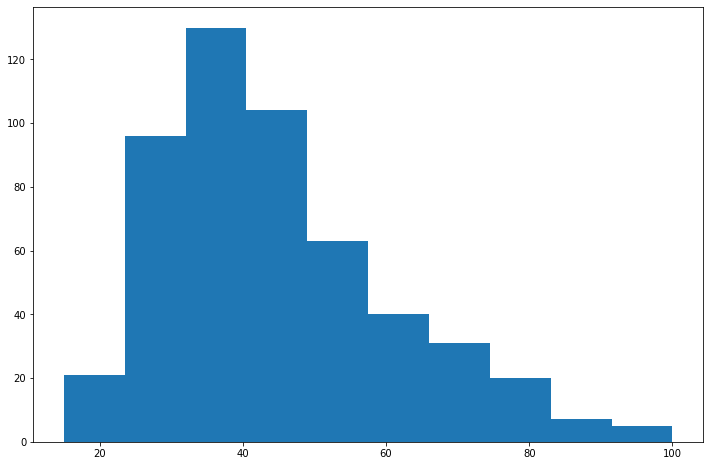

In [6]:
plt.figure(figsize=(12,8))
plt.hist(data['RH'])

## `Bar Chart For TEMP`

(array([ 18.,  11.,  31.,  47.,  92., 127.,  99.,  55.,  24.,  13.]),
 array([ 2.2 ,  5.31,  8.42, 11.53, 14.64, 17.75, 20.86, 23.97, 27.08,
        30.19, 33.3 ]),
 <BarContainer object of 10 artists>)

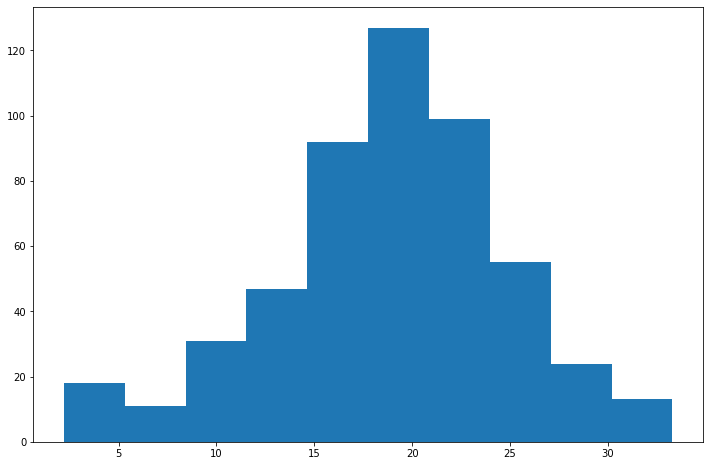

In [7]:
plt.figure(figsize=(12,8))
plt.hist(data['temp'])

## `Boxplor for FFMC`

<AxesSubplot:>

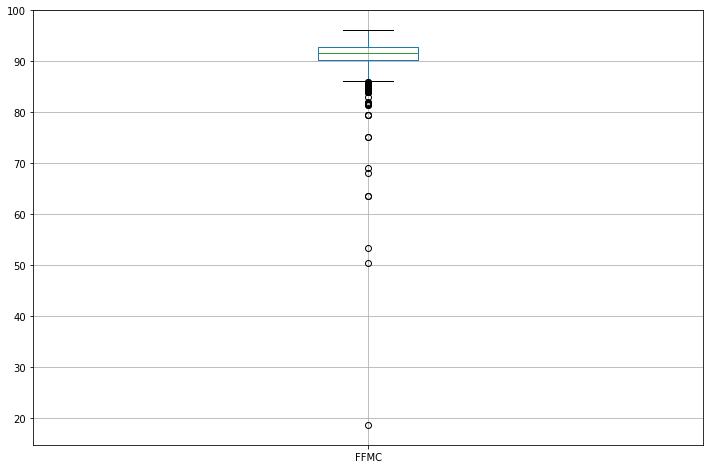

In [8]:
plt.figure(figsize=(12,8))
data.boxplot(column=['FFMC'])

## `Boxplot for WIND`

<AxesSubplot:>

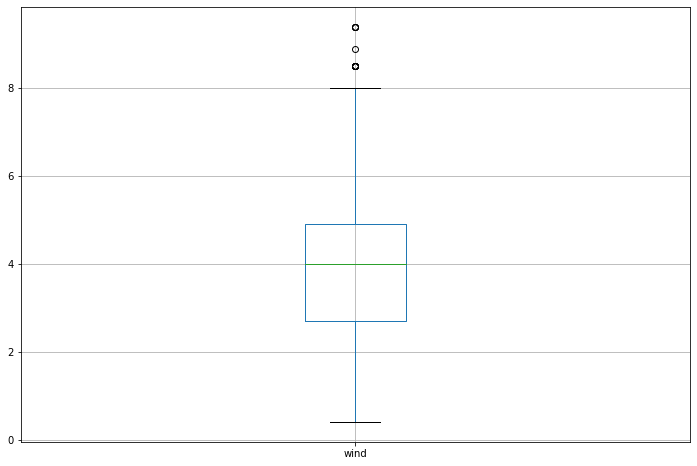

In [9]:
plt.figure(figsize=(12,8))
data.boxplot(column=['wind'])

## `Boxen Plot`

<function matplotlib.pyplot.show(close=None, block=None)>

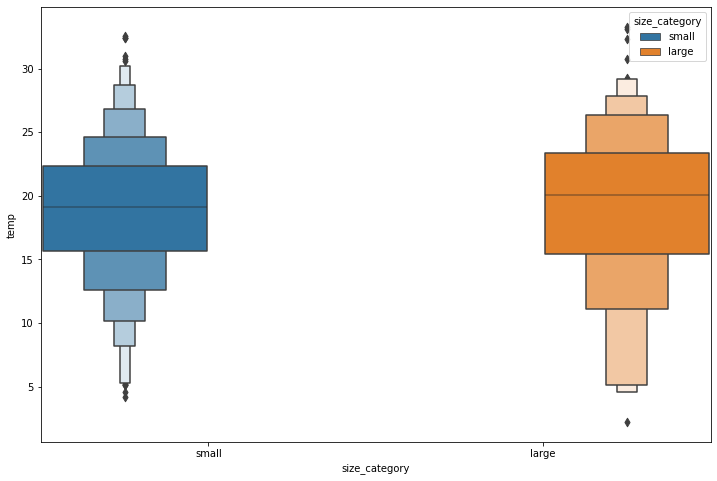

In [10]:
plt.figure(figsize=(12,8))
sns.boxenplot(x= 'size_category',y='temp',hue="size_category",data=data,width=1)
plt.show

## `Reducing Columns By Using PCA`

In [11]:
pca= PCA(n_components=27)
pca_values =pca.fit_transform(data_norm)
pca_values

array([[ 4.20321083e-01, -1.05650975e+00, -1.26683712e+00, ...,
         3.56334657e-02,  1.07143377e-14,  2.11172212e-15],
       [ 7.33773615e-01, -1.43611214e+00, -1.41363816e+00, ...,
         2.34333675e-02, -2.17939748e-15, -1.20025433e-16],
       [ 3.68364857e+00,  8.37712884e-01,  1.53480089e+00, ...,
        -8.71645892e-02,  2.20434968e-15,  2.32543387e-15],
       ...,
       [ 2.70210552e-01,  1.15215831e+00,  2.08147562e+00, ...,
        -3.07500267e-01,  4.35456817e-16, -1.49830188e-16],
       [-1.45826748e+00,  1.11146241e+00, -3.88276931e-01, ...,
         4.98704588e-02,  3.00169004e-17, -9.93850586e-17],
       [ 3.49629480e+00,  4.98978613e-01, -1.52949427e+00, ...,
        -2.50626368e-02,  9.83117155e-17, -8.41794074e-17]])

In [12]:
var = pca.explained_variance_ratio_
var

array([1.27656336e-01, 7.00515513e-02, 6.03130671e-02, 5.34747246e-02,
       4.91455886e-02, 4.85285589e-02, 4.53835810e-02, 4.42952080e-02,
       4.24348274e-02, 4.10905573e-02, 4.04570937e-02, 3.85483248e-02,
       3.77701914e-02, 3.76330333e-02, 3.69228835e-02, 3.61584939e-02,
       3.48174596e-02, 3.32881681e-02, 3.15371395e-02, 3.04821426e-02,
       2.42869127e-02, 1.96236782e-02, 1.04810256e-02, 4.77508341e-03,
       8.44369649e-04, 2.51757731e-32, 4.45554266e-33])

In [13]:
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 12.77,  19.78,  25.81,  31.16,  36.07,  40.92,  45.46,  49.89,
        54.13,  58.24,  62.29,  66.14,  69.92,  73.68,  77.37,  80.99,
        84.47,  87.8 ,  90.95,  94.  ,  96.43,  98.39,  99.44,  99.92,
       100.  , 100.  , 100.  ])

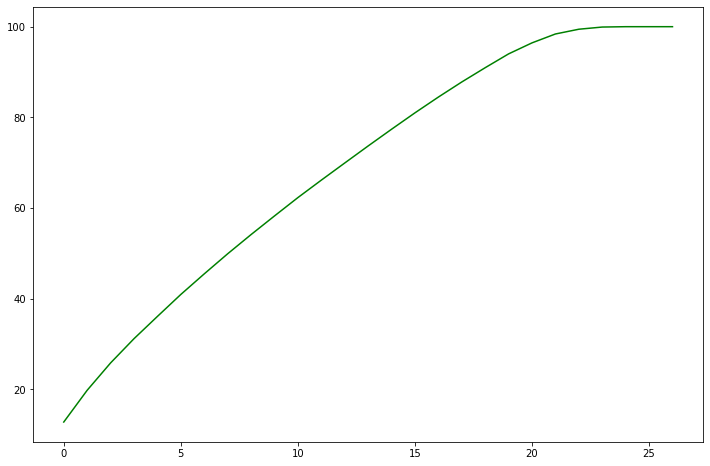

In [14]:
plt.figure(figsize=(12,8))
plt.plot(var1,color='green')

## `22 pca's out of 28 for further process`

In [15]:
final_df = pd.concat([pd.DataFrame(pca_values[:,0:22],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10',
'pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22']),data[['size_category']]],axis=1)
final_df.size_category.replace(('large','small'),(1,0), inplace=True)
final_df,

(          pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
 0    0.420321 -1.056510 -1.266837  0.836158  3.041443  0.794468 -2.804942   
 1    0.733774 -1.436112 -1.413638  2.244203  1.502521  0.275882 -1.515934   
 2    3.683649  0.837713  1.534801 -1.117375 -1.868661  1.141984 -0.125820   
 3    3.061055  0.967917  1.605533  1.115412 -0.776782 -0.557732 -0.716327   
 4   -0.795240  1.885239  0.087313  0.095776 -0.189321 -1.092051 -0.541247   
 ..        ...       ...       ...       ...       ...       ...       ...   
 512  0.126135  0.986634  1.961826  0.801641  0.339803 -0.938879 -0.010546   
 513  0.270211  1.152158  2.081476  0.514962  0.320586 -0.996262 -0.114781   
 514 -1.458267  1.111462 -0.388277  1.235825 -0.182139  0.724820  0.863925   
 515  3.496295  0.498979 -1.529494 -1.067717  6.419201  5.648577 -1.972947   
 516       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 
           pc8       pc9      pc10  ...      pc14       pc15  

## `Data into X & Y`

In [16]:
array = final_df.values
X = array[:,0:22]
Y = array[:,22]

## `Creating Model`

In [17]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(40,input_dim=22,activation='relu'))
model.add( tf.keras.layers.Dense(11,activation='relu'))
model.add( tf.keras.layers.Dense(1,activation='sigmoid'))

## `Compile Model`

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## `Model Summary`

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                920       
                                                                 
 dense_1 (Dense)             (None, 11)                451       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 1,383
Trainable params: 1,383
Non-trainable params: 0
_________________________________________________________________


## `Fit Model At 30% Of Test Data`

In [20]:
history = model.fit(X,Y, validation_split=0.3,epochs=100,batch_size=10)

Epoch 1/100
37/37 [==============================] - 1s 8ms/step - loss: 0.6063 - accuracy: 0.7562 - val_loss: nan - val_accuracy: 0.6731
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5595 - accuracy: 0.7562 - val_loss: nan - val_accuracy: 0.6731
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5332 - accuracy: 0.7562 - val_loss: nan - val_accuracy: 0.6731
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 0.5162 - accuracy: 0.7562 - val_loss: nan - val_accuracy: 0.6731
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 0.5057 - accuracy: 0.7562 - val_loss: nan - val_accuracy: 0.6731
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4948 - accuracy: 0.7562 - val_loss: nan - val_accuracy: 0.6731
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4893 - accuracy: 0.7562 - val_loss: nan - val_accuracy: 0.6731
Epoch 8/100
37/37 [===============

## `Evaluating Model`

In [21]:
scores= model.evaluate(X,Y)
print("%s:%.2f%%" %(model.metrics_names[1],scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8395
accuracy:83.95%


In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## `Summarize History For Accuracy`

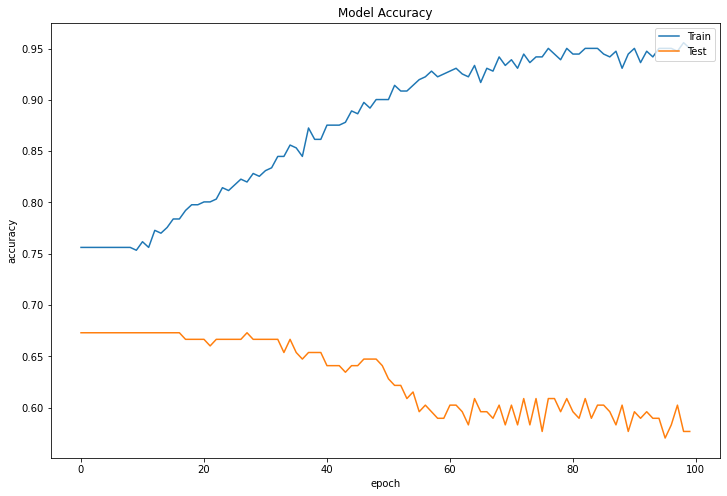

In [23]:
%matplotlib inline
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='upper right')
plt.show()